In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("guns.csv")

In [33]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
df.head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


In [4]:
df["intent"].unique()

array(['Suicide', 'Undetermined', 'Accidental', 'Homicide', nan],
      dtype=object)

### Q. How does the number of annual suicide gun-deaths vary across the years, by gender?

In [9]:
suicidedf = df[df.intent == "Suicide"]

In [10]:
suicidedf.groupby("year")["sex"].value_counts()



year  sex
2012  M      17910
      F       2756
2013  M      18241
      F       2934
2014  M      18335
      F       2999
Name: sex, dtype: int64

<Axes: xlabel='year,sex'>

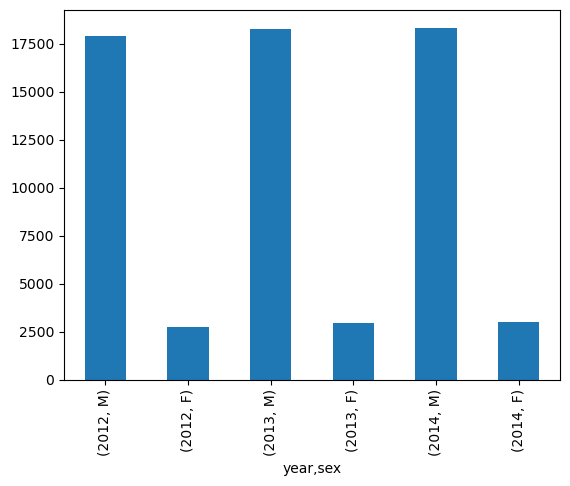

In [11]:
suicidedf.groupby("year")["sex"].value_counts().plot(kind="bar")


In [14]:
df.groupby("race").value_counts()

race                    Unnamed: 0  year  month  intent    police  sex  age   hispanic  place               education   
Asian/Pacific Islander  1           2012  1      Suicide   0       M    34.0  100       Home                BA+             1
                        19          2012  3      Homicide  0       M    31.0  100       Home                Some college    1
                        76829       2014  8      Suicide   0       M    60.0  100       Trade/service area  BA+             1
                        77370       2014  4      Suicide   0       M    21.0  100       Home                Some college    1
                        77369       2014  4      Suicide   0       M    61.0  100       Home                Some college    1
                                                                                                                           ..
White                   32          2012  4      Suicide   0       M    55.0  100       Home                BA+            

In [15]:
df["race"].unique()

array(['Asian/Pacific Islander', 'White',
       'Native American/Native Alaskan', 'Black', 'Hispanic'],
      dtype=object)

### What is the number of gun deaths by race per 100,000 people in the USA?


In [24]:
gun_deaths_by_race = df["race"].value_counts().reset_index()


In [23]:
gun_deaths_by_race

,index,race
0,White,66237
1,Black,23296
2,Hispanic,9022
3,Asian/Pacific Islander,1326
4,Native American/Native Alaskan,917


In [25]:
gun_deaths_by_race.columns = ["race","deaths"]

In [26]:
gun_deaths_by_race.head()

,race,deaths
0,White,66237
1,Black,23296
2,Hispanic,9022
3,Asian/Pacific Islander,1326
4,Native American/Native Alaskan,917


In [18]:
gun_deaths_by_race["per_100"] = gun_deaths_by_race["deaths"]/300000000 * 100000 # assuming the total population of USA is 300M
gun_deaths_by_race

,race,deaths,per_100
0,White,66237,22.079000
1,Black,23296,7.765333
2,Hispanic,9022,3.007333
3,Asian/Pacific Islander,1326,0.442000
4,Native American/Native Alaskan,917,0.305667


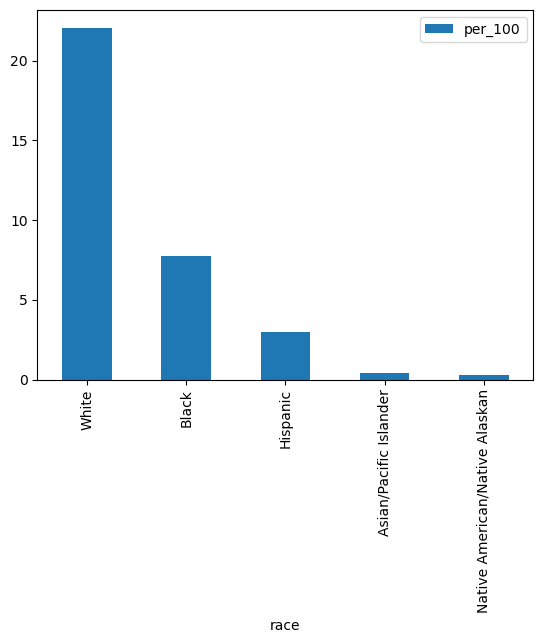

In [21]:
gun_deaths_by_race[["race","per_100"]].set_index("race").plot(kind="bar")
plt.legend()
plt.show()

### What is the average number of gun-deaths by cause, in the USA?


In [27]:
df.head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


In [31]:
df.groupby("intent").value_counts()

intent        Unnamed: 0  year  month  police  sex  age   race                    hispanic  place              education   
Accidental    9           2012  2      0       M    50.0  White                   100       Other specified    Some college    1
              57          2012  7      0       M    12.0  Black                   100       Home               Less than HS    1
              66526       2013  12     0       F    32.0  White                   100       Home               Some college    1
              67361       2014  1      0       M    36.0  White                   100       Other specified    Less than HS    1
              67302       2014  9      0       M    59.0  White                   100       Home               BA+             1
                                                                                                                              ..
Undetermined  702         2012  9      0       M    22.0  White                   100       Street    

In [32]:
df["intent"].value_counts()

Suicide         63175
Homicide        35176
Accidental       1639
Undetermined      807
Name: intent, dtype: int64

In [34]:
deaths_by_cause = pd.DataFrame(data=df['intent'].value_counts()).reset_index()

In [35]:
deaths_by_cause

,index,intent
0,Suicide,63175
1,Homicide,35176
2,Accidental,1639
3,Undetermined,807


In [37]:
deaths_by_cause['average_death'] = deaths_by_cause['intent']/df.shape[0]
deaths_by_cause.head()

,index,intent,average_death
0,Suicide,63175,0.626749
1,Homicide,35176,0.348975
2,Accidental,1639,0.016260
3,Undetermined,807,0.008006


<BarContainer object of 4 artists>

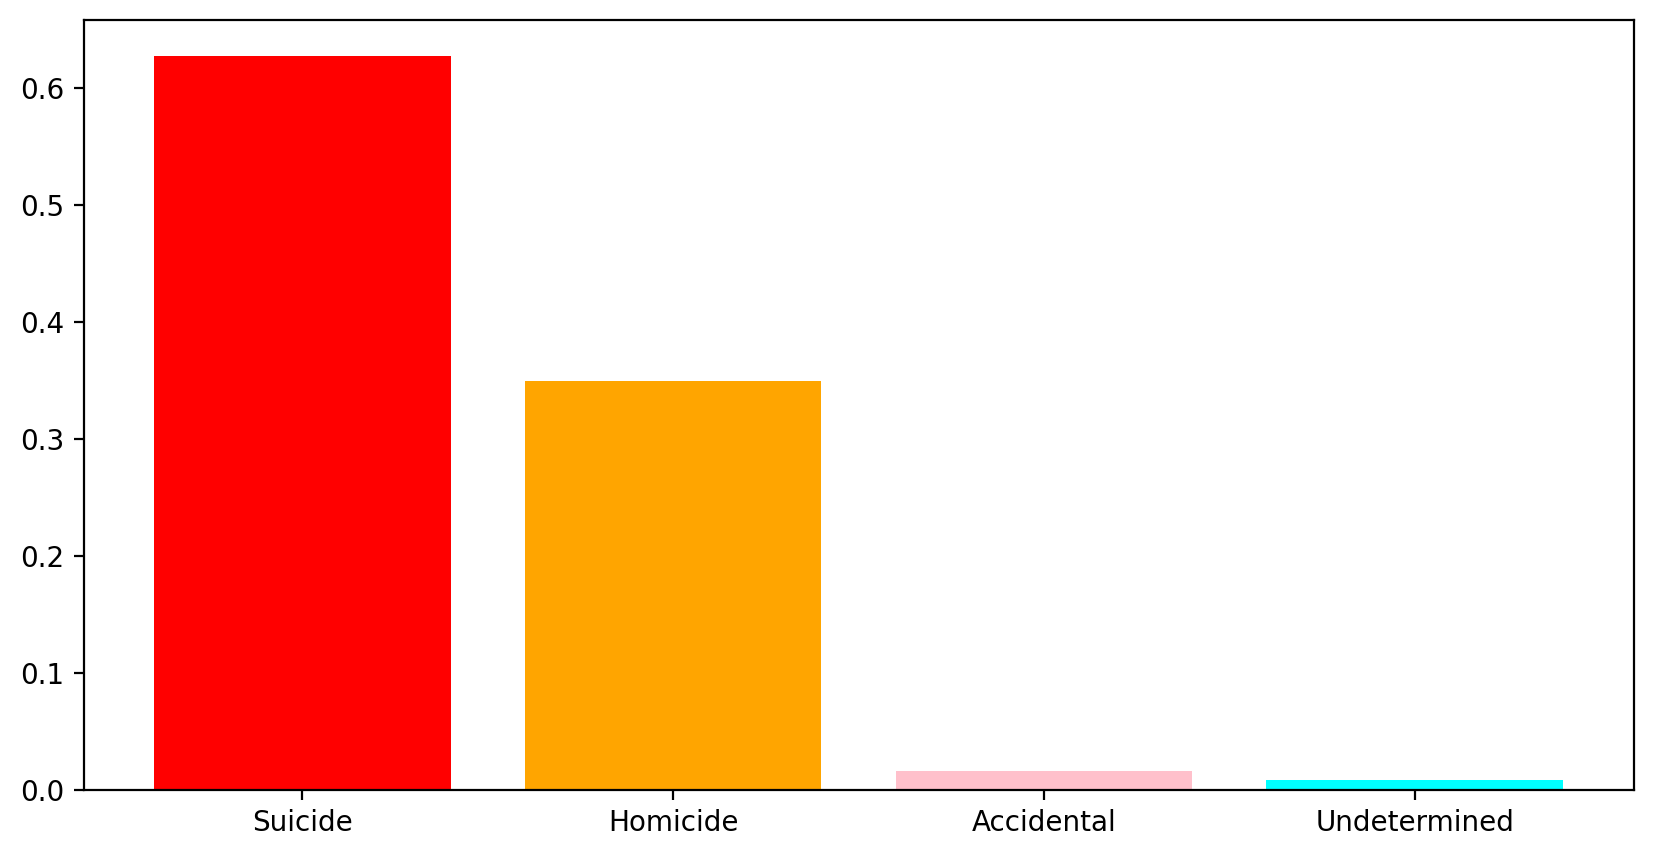

In [38]:
plt.figure(figsize=(10,5))
plt.bar(x=deaths_by_cause['index'], height=deaths_by_cause['average_death'], color=['red', 'orange', 'pink', 'cyan'])

### Q4. What is the percentage per 100,000 people of annual gun deaths in the United Stated from 2012 to 2014 by cause?

In [40]:
gun_deaths_by_intent = df['intent'].value_counts().reset_index()
gun_deaths_by_intent.columns = ['intent', 'deaths']

In [41]:
gun_deaths_by_intent

,intent,deaths
0,Suicide,63175
1,Homicide,35176
2,Accidental,1639
3,Undetermined,807


In [42]:
# Assuming the population of the US is 300M

gun_deaths_by_intent['per_100'] = gun_deaths_by_intent['deaths']/300000000*100000
gun_deaths_by_intent

,intent,deaths,per_100
0,Suicide,63175,21.058333
1,Homicide,35176,11.725333
2,Accidental,1639,0.546333
3,Undetermined,807,0.269000


<BarContainer object of 4 artists>

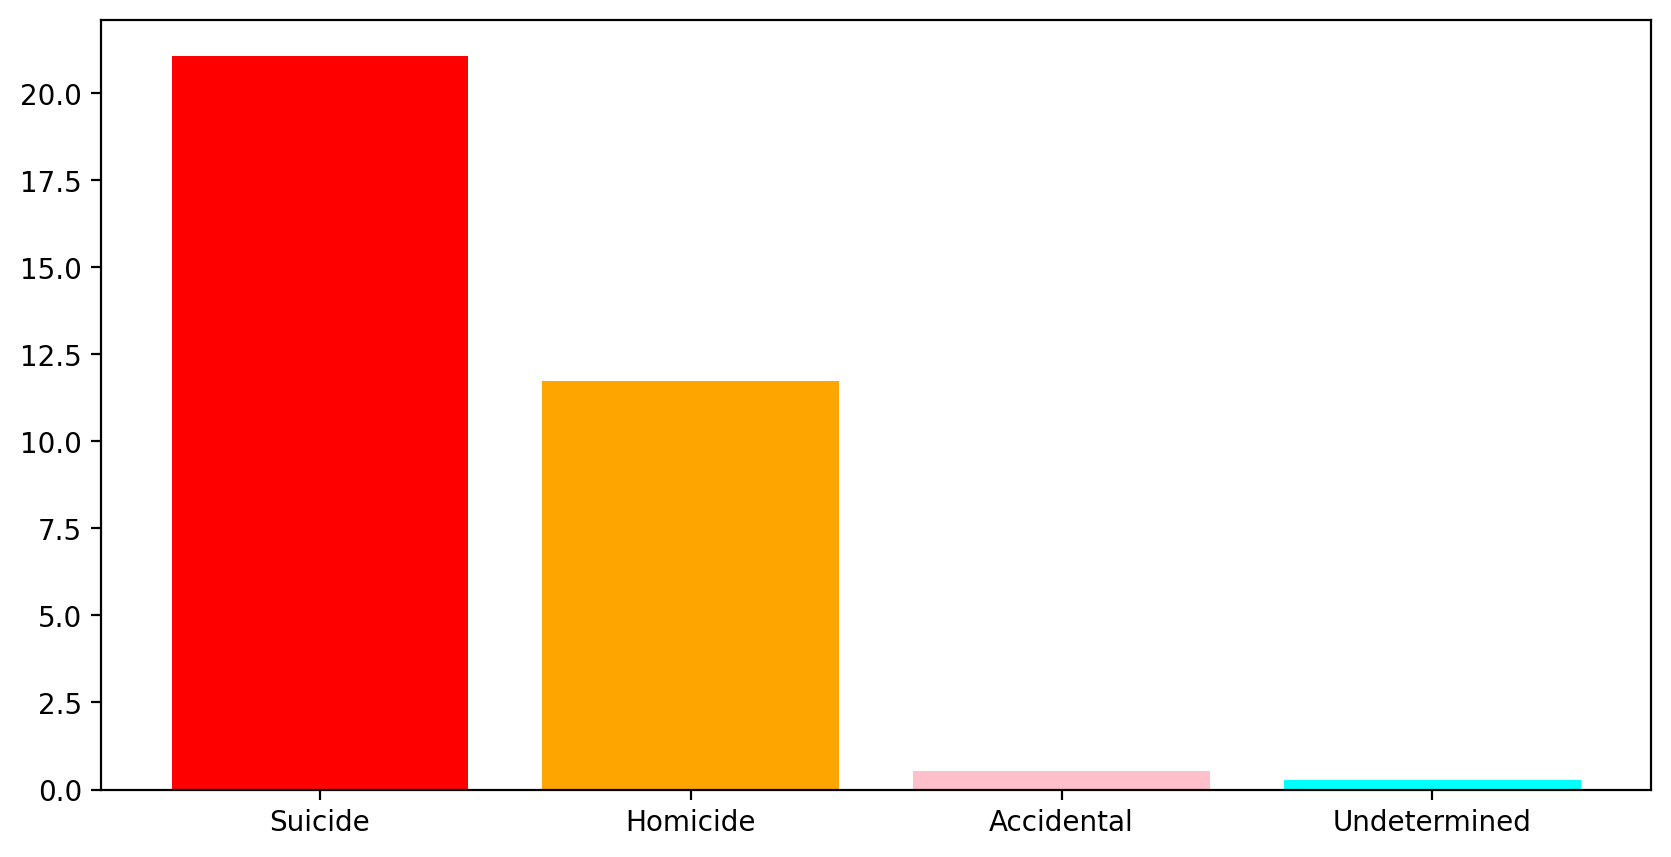

In [43]:
plt.figure(figsize=(10,5))
plt.bar(x=gun_deaths_by_intent['intent'], height=gun_deaths_by_intent['per_100'], color=['red', 'orange', 'pink', 'cyan'])

### Q5. what is the percentage of annual suicide gun deaths in United States from 2012 to 2014, by year?

In [50]:
suicide_by_year = suicidedf["year"].value_counts().reset_index()

In [51]:
suicide_by_year

,index,year
0,2014,21334
1,2013,21175
2,2012,20666


In [52]:
suicide_by_year.columns = ["year","count"]

In [53]:
suicide_by_year

,year,count
0,2014,21334
1,2013,21175
2,2012,20666


In [55]:
all_count = df["year"].value_counts().reset_index()

In [56]:
all_count

,index,year
0,2013,33636
1,2014,33599
2,2012,33563


In [57]:
all_count.columns = ["year","count"]

In [58]:
all_count

,year,count
0,2013,33636
1,2014,33599
2,2012,33563


In [59]:
suicide_by_year['percent'] = (suicide_by_year['count']/all_count['count'])*100

suicide_by_year.sort_values('year', inplace=True)
suicide_by_year

,year,count,percent
2,2012,20666,61.573757
1,2013,21175,63.022709
0,2014,21334,63.426091


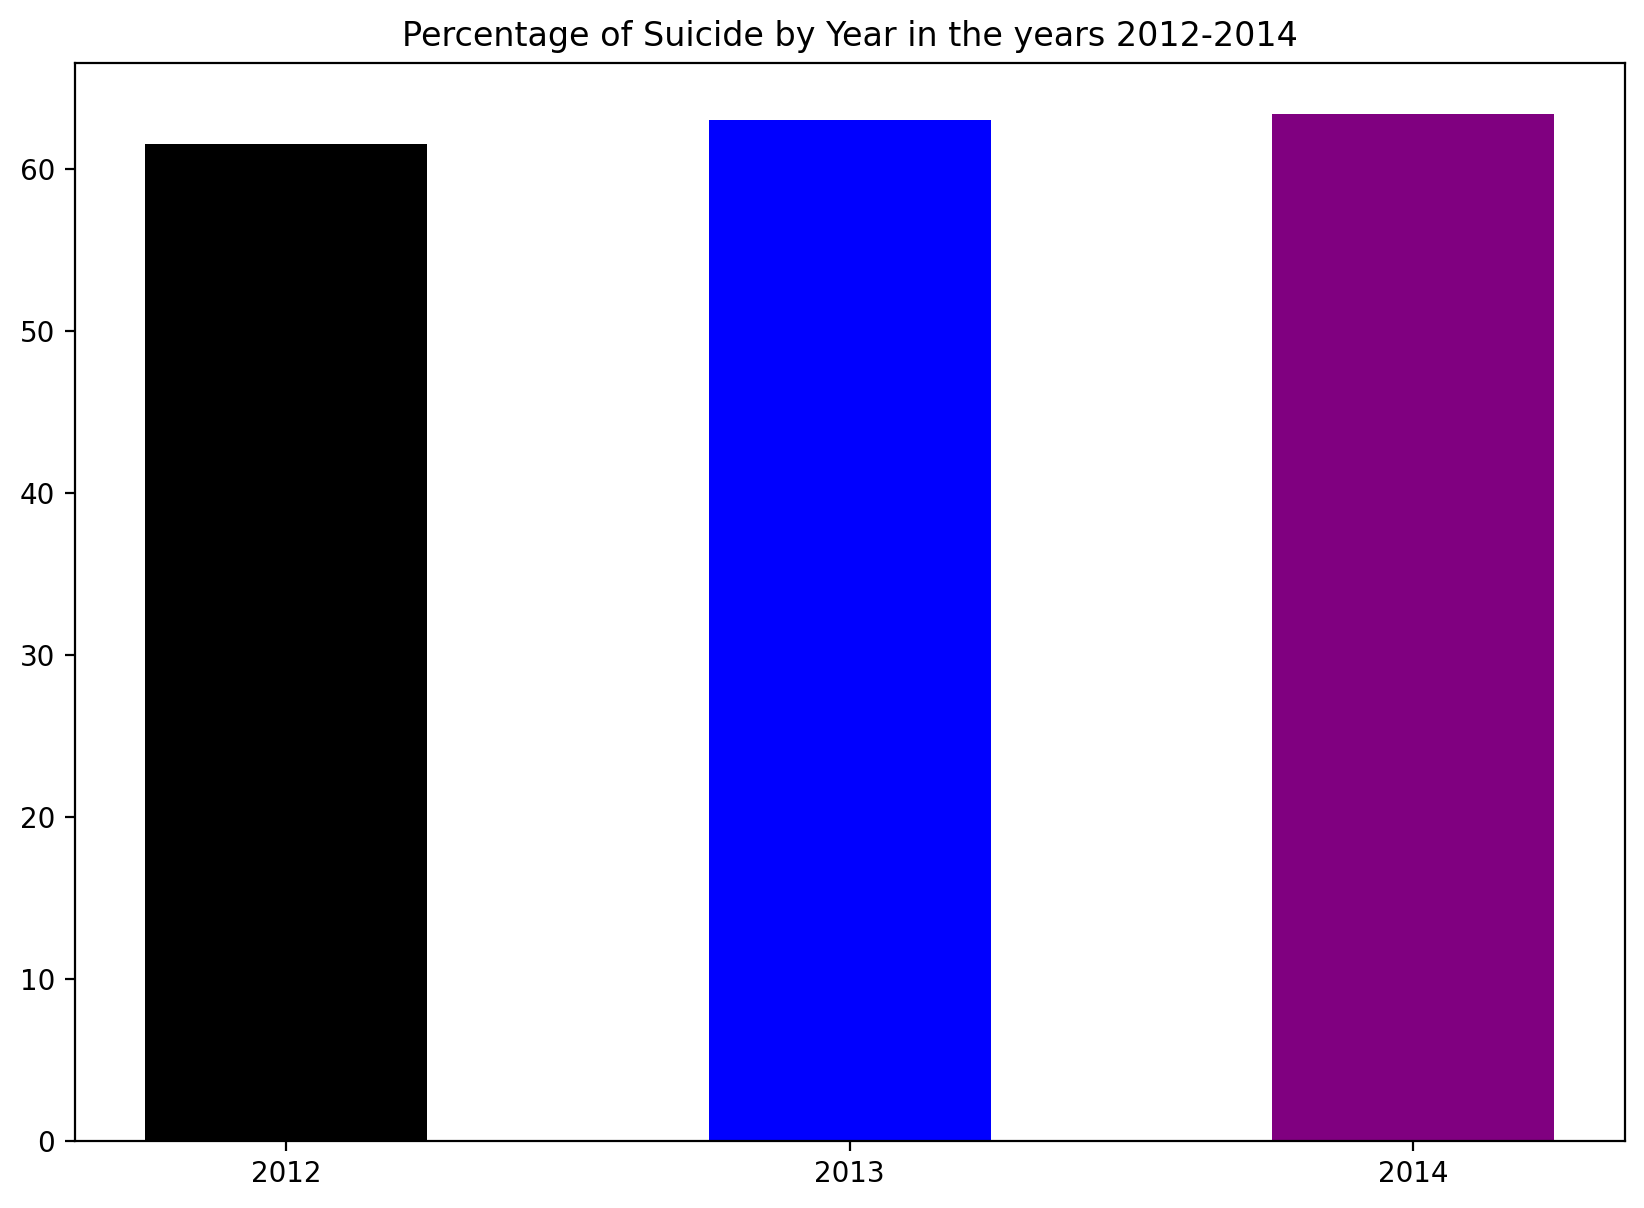

In [60]:
plt.figure(figsize=(10,7))
plt.bar(x=suicide_by_year['year'], height=suicide_by_year['percent'], width=0.5, color = ['black', 'blue', 'purple'])
plt.xticks(suicide_by_year['year'])
plt.title("Percentage of Suicide by Year in the years 2012-2014")
plt.show()